In [1]:
# add your data (ie: CSV, JSON, etc.) to the static/data folder 
# explore the data using this notebook if you want :)
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import h5py
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#  Import and read the charity_data.csv.
BlackFriday_df = pd.read_csv("Resources/Sales_Product_Price_by_Store_JFC.csv")
BlackFriday_df

,Store,Product,Date,Week_of_Year,Day_of_Year,Is_Holiday,Base Price,Price,Weekly_Units_Sold,NormToMin_Weekly_Units_Sold,NormToMax_Weekly_Units_Sold
0,1,1,2/5/2010,5,36,False,9.99,7.99,245,2.380000,0.541000
1,1,1,2/12/2010,6,43,True,9.99,7.99,453,4.400000,1.000000
2,1,1,2/19/2010,7,50,False,9.99,7.99,409,3.970000,0.903000
3,1,1,2/26/2010,8,57,False,9.99,7.99,191,1.850000,0.422000
4,1,1,3/5/2010,9,64,False,9.99,9.99,145,1.410000,0.320000
...,...,...,...,...,...,...,...,...,...,...,...
3856,10,3,9/28/2012,39,272,False,19.99,19.99,133,1.156522,0.052014
3857,10,3,10/5/2012,40,279,False,19.99,19.99,133,1.156522,0.052014
3858,10,3,10/12/2012,41,286,False,19.99,19.99,127,1.104348,0.049668
3859,10,3,10/19/2012,42,293,False,19.99,19.99,133,1.156522,0.052014


## Exploratory Data Analysis

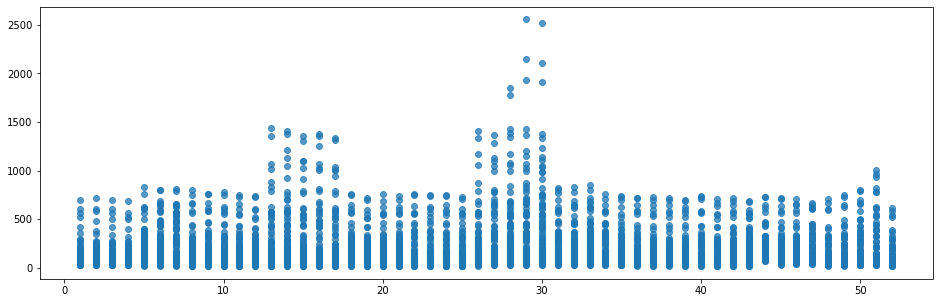

In [2]:
# x values are day of the year
x_axis = BlackFriday_df['Week_of_Year']

# y values are the weekly units sold
data = BlackFriday_df['Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

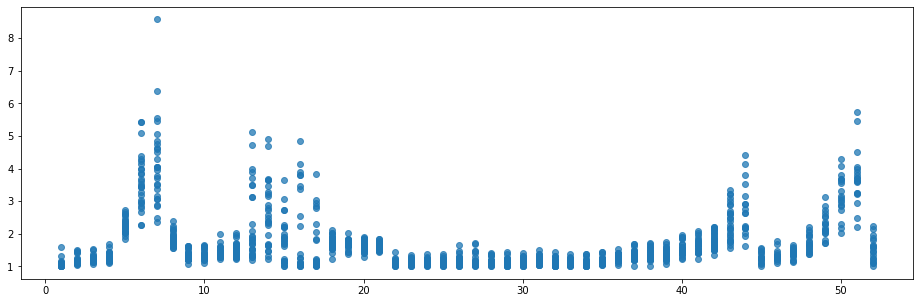

In [3]:
# filter for product 1 based on minimum normalization
BlackFriday_P1_df = BlackFriday_df[BlackFriday_df['Product'] == 1]
# BlackFriday_P1_df = BlackFriday_df[BlackFriday_df['Store'] == 1]
# x values are day of the year
x_axis = BlackFriday_P1_df['Week_of_Year']

# y values are the weekly units sold
data = BlackFriday_P1_df['NormToMin_Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

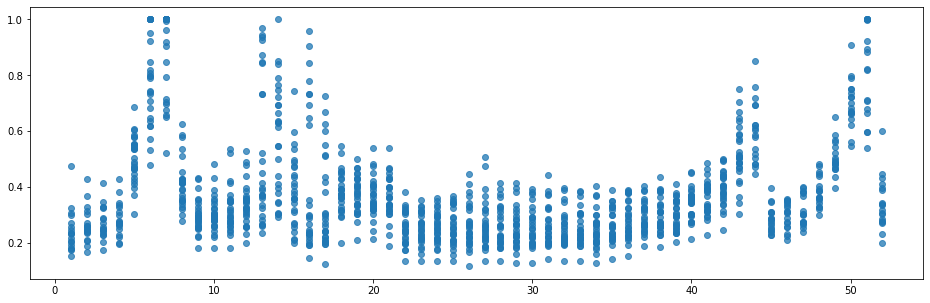

In [4]:
# filter for product 1 based on maximum normalization
BlackFriday_P1_df = BlackFriday_df[BlackFriday_df['Product'] == 1]
# BlackFriday_P1_df = BlackFriday_df[BlackFriday_df['Store'] == 1]
# x values are day of the year
x_axis = BlackFriday_P1_df['Week_of_Year']

# y values are the weekly units sold
data = BlackFriday_P1_df['NormToMax_Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

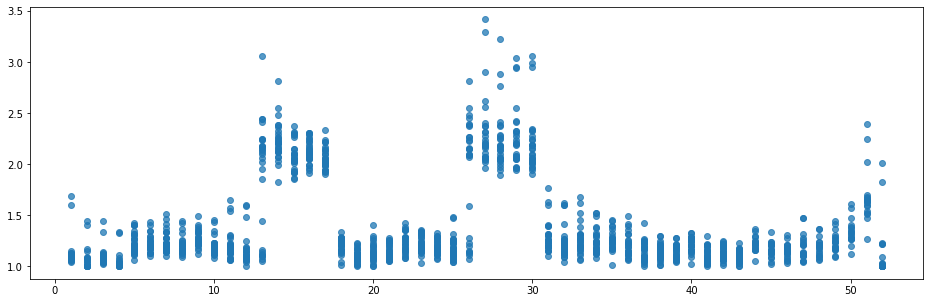

In [5]:
# filter for product 2 based on minimum normalization
BlackFriday_P2_df = BlackFriday_df[BlackFriday_df['Product'] == 2]

# x values are day of the year
x_axis = BlackFriday_P2_df['Week_of_Year']

# y values are the weekly units sold
data = BlackFriday_P2_df['NormToMin_Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

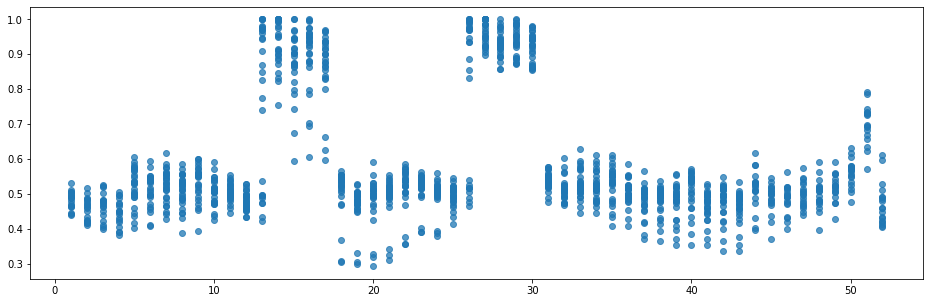

In [6]:
# filter for product 2 based on maximum normalization
BlackFriday_P2_df = BlackFriday_df[BlackFriday_df['Product'] == 2]

# x values are day of the year
x_axis = BlackFriday_P2_df['Week_of_Year']

# y values are the weekly units sold
data = BlackFriday_P2_df['NormToMax_Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

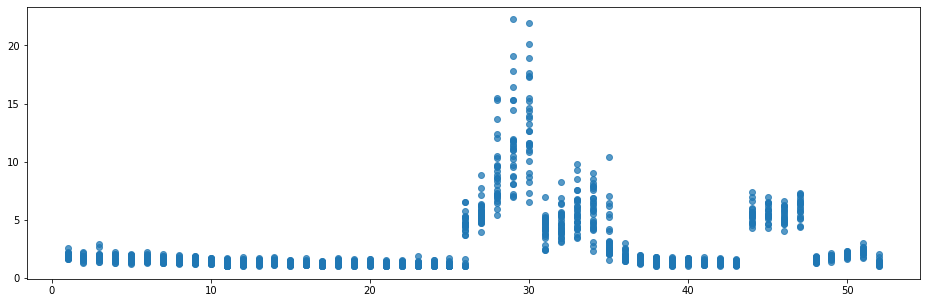

In [7]:
# filter for product 3 based on minimum normalization
BlackFriday_P3_df = BlackFriday_df[BlackFriday_df['Product'] == 3]

# x values are day of the year
x_axis = BlackFriday_P3_df['Week_of_Year']

# y values are the weekly units sold
data = BlackFriday_P3_df['NormToMin_Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

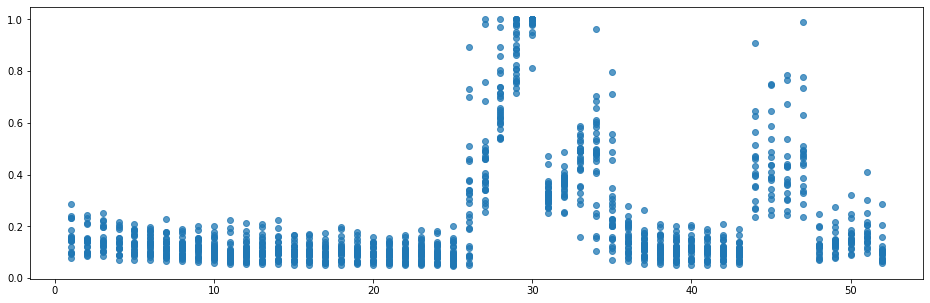

In [8]:
# filter for product 3 based on maximum normalization
BlackFriday_P3_df = BlackFriday_df[BlackFriday_df['Product'] == 3]

# x values are day of the year
x_axis = BlackFriday_P3_df['Week_of_Year']

# y values are the weekly units sold
data = BlackFriday_P3_df['NormToMax_Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

## Preprocessing

In [9]:
BlackFriday_df.columns

Index(['Store', 'Product', 'Date', 'Week_of_Year', 'Day_of_Year', 'Is_Holiday',
       'Base Price', 'Price', 'Weekly_Units_Sold',
       'NormToMin_Weekly_Units_Sold', 'NormToMax_Weekly_Units_Sold'],
      dtype='object')

In [10]:
from datetime import datetime, date
day_of_year = date(2007, 12, 31).timetuple().tm_yday  # returns 1 for January 1st
day_of_year

365

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
BlackFriday_convert_df = pd.get_dummies(BlackFriday_df, columns=['Product', 'Is_Holiday'])

# Drop the 'Is_Holiday_False' column since it is just the reverse of the 'Is_Holiday_True' column
BlackFriday_convert_df = BlackFriday_convert_df.drop('Is_Holiday_False', axis = 1)
BlackFriday_convert_df = BlackFriday_convert_df.drop('Store', axis = 1)
# BlackFriday_convert_df = BlackFriday_convert_df.drop('Unnamed: 0', axis = 1)
BlackFriday_convert_df

,Date,Week_of_Year,Day_of_Year,Base Price,Price,Weekly_Units_Sold,NormToMin_Weekly_Units_Sold,NormToMax_Weekly_Units_Sold,Product_1,Product_2,Product_3,Is_Holiday_True
0,2/5/2010,5,36,9.99,7.99,245,2.380000,0.541000,1,0,0,0
1,2/12/2010,6,43,9.99,7.99,453,4.400000,1.000000,1,0,0,1
2,2/19/2010,7,50,9.99,7.99,409,3.970000,0.903000,1,0,0,0
3,2/26/2010,8,57,9.99,7.99,191,1.850000,0.422000,1,0,0,0
4,3/5/2010,9,64,9.99,9.99,145,1.410000,0.320000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3856,9/28/2012,39,272,19.99,19.99,133,1.156522,0.052014,0,0,1,0
3857,10/5/2012,40,279,19.99,19.99,133,1.156522,0.052014,0,0,1,0
3858,10/12/2012,41,286,19.99,19.99,127,1.104348,0.049668,0,0,1,0
3859,10/19/2012,42,293,19.99,19.99,133,1.156522,0.052014,0,0,1,0


In [12]:
# filter for Holidays
BlackFriday_Is_Holiday_True_df = BlackFriday_convert_df[BlackFriday_convert_df['Is_Holiday_True'] == 1]
BlackFriday_Is_Holiday_True_df

,Date,Week_of_Year,Day_of_Year,Base Price,Price,Weekly_Units_Sold,NormToMin_Weekly_Units_Sold,NormToMax_Weekly_Units_Sold,Product_1,Product_2,Product_3,Is_Holiday_True
1,2/12/2010,6,43,9.99,7.99,453,4.400000,1.000000,1,0,0,1
31,9/10/2010,36,253,9.99,9.99,121,1.170000,0.267000,1,0,0,1
42,11/26/2010,47,330,9.99,9.99,125,1.210000,0.276000,1,0,0,1
47,12/31/2010,52,365,9.99,9.99,127,1.230000,0.280000,1,0,0,1
53,2/11/2011,6,42,10.99,8.79,323,3.850000,0.810000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3801,9/9/2011,36,252,21.99,21.99,160,1.584158,0.082859,0,0,1,1
3812,11/25/2011,47,329,21.99,11.00,455,4.504950,0.235629,0,0,1,1
3817,12/30/2011,52,364,21.99,21.99,125,1.237624,0.064733,0,0,1,1
3823,2/10/2012,6,41,19.99,19.99,179,1.556522,0.070004,0,0,1,1


In [13]:
# drop the date column
BlackFriday_convert_df.drop(BlackFriday_convert_df.iloc[:, 0:1], inplace = True, axis = 1)

BlackFriday_convert_df.dtypes

Week_of_Year                     int64
Day_of_Year                      int64
Base Price                     float64
Price                          float64
Weekly_Units_Sold                int64
NormToMin_Weekly_Units_Sold    float64
NormToMax_Weekly_Units_Sold    float64
Product_1                        uint8
Product_2                        uint8
Product_3                        uint8
Is_Holiday_True                  uint8
dtype: object

In [14]:
# Split our preprocessed data into our features and target arrays
y = BlackFriday_convert_df["NormToMax_Weekly_Units_Sold"].values
BlackFriday_convert_df.drop(BlackFriday_convert_df.iloc[:, 3:7], inplace = True, axis = 1)

X = BlackFriday_convert_df


In [15]:

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

### Deep Neural Network 1

In [17]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# number_input_features = 10
# hidden_nodes_layer1 =  10
# hidden_nodes_layer2 = 5

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, input_dim = number_input_features, activation = "relu"))

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = "relu"))

# # Output layer
# nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# # Check the structure of the model
# nn.summary()

In [18]:
# # Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# # Train the model
# fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

### Deep Neural Network 2

In [20]:
# # Create a method that creates a new Sequential model with hyperparameter options
# def create_model(hp):
#     nn_model = tf.keras.models.Sequential()

#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
#     # Allow kerastuner to decide number of neurons in first layer
#     nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=1,
#         max_value=10,
#         step=2), activation=activation, input_dim=7))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 6)):
#         nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=1,
#             max_value=10,
#             step=2),
#             activation=activation))
    
#     nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
#     return nn_model

In [21]:
# # Import the kerastuner library
# import keras_tuner as kt

# tuner = kt.Hyperband(
#     create_model,
#     objective="val_accuracy",
#     max_epochs=20,
#     hyperband_iterations=2)

In [22]:
# # Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

### Random Forest

In [23]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier = LogisticRegression(max_iter=100)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {round(classifier.score(X_train, y_train),4)}")
print(f"Testing Data Score: {round(classifier.score(X_test, y_test),4)}")

ValueError: Unknown label type: 'continuous'

In [ ]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {round(clf.score(X_train, y_train),4)}')
print(f'Testing Score: {round(clf.score(X_test, y_test),4)}')

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier = LogisticRegression(max_iter=100)
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {round(classifier.score(X_train_scaled, y_train),4)}")
print(f"Testing Data Score: {round(classifier.score(X_test_scaled, y_test),4)}")

In [ ]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {round(clf.score(X_train_scaled, y_train),4)}')
print(f'Testing Score: {round(clf.score(X_test_scaled, y_test),4)}')

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
X_test_scaled.shape

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")